In [13]:
import pandas as pd  # Data processing and manipulation, especially for handling DataFrames (e.g., reading Excel/CSV files)
import seaborn as sns  # Data visualization library based on matplotlib, useful for creating attractive and informative statistical plots
import numpy as np  # Numerical computing library, essential for working with arrays and performing linear algebra operations
import matplotlib.pyplot as plt  # Core library for creating static, animated, and interactive visualizations in Python

from sklearn.model_selection import train_test_split  # Utility for splitting datasets into training and testing sets
from sklearn.preprocessing import PolynomialFeatures  # Generates polynomial and interaction features for regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  # Linear models with different regularization techniques
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Metrics for evaluating the performance of regression models
from sklearn.preprocessing import MinMaxScaler  # Scales features to a specific range, commonly (0, 1)

import statsmodels.api as sm  # Library for statistical modeling, often used for more in-depth regression analysis and hypothesis testing


# 1. Data Loading and Preprocessing

In [14]:
#df = pd.read_excel('synthetic_regression_data.xlsx')
df = pd.read_excel('synthetic_regression_data.xlsx', engine='openpyxl')
# Display the first few rows of the dataset
print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  37.454012  95.071431  73.199394  59.865848  15.601864  15.599452   
1   5.808361  86.617615  60.111501  70.807258   2.058449  96.990985   
2  83.244264  21.233911  18.182497  18.340451  30.424224  52.475643   
3  43.194502  29.122914  61.185289  13.949386  29.214465  36.636184   
4  45.606998  78.517596  19.967378  51.423444  59.241457   4.645041   

       Target  
0  150.788121  
1  208.552826  
2  126.363146  
3  141.815808  
4  111.020196  


In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:", missing_values)

# Handle missing values (if any)
data = df.fillna(df.mean())   

# Split the data into training and testing sets
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Missing values in each column: Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Target       0
dtype: int64


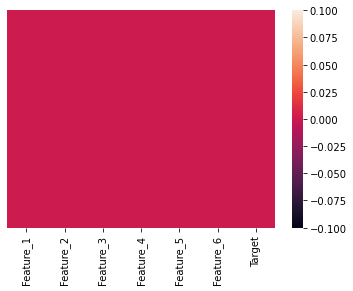

In [19]:
sns.heatmap(df.isnull(), yticklabels=False);

# 2. Model Design

In [23]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Stepwise Regression (Forward Selection using statsmodels)
def forward_selection(X, y):
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []
    
    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            features = initial_features + [candidate]
            X_with_candidate = X[features]
            X_with_candidate = sm.add_constant(X_with_candidate)
            model = sm.OLS(y, X_with_candidate).fit()
            score = model.aic
            scores_with_candidates.append((score, candidate))
        
        scores_with_candidates.sort()
        best_score, best_candidate = scores_with_candidates[0]
        initial_features.append(best_candidate)
        remaining_features.remove(best_candidate)
        best_features = initial_features.copy()
    
    return best_features

best_features = forward_selection(X_train, y_train)
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]
stepwise_model = LinearRegression()
stepwise_model.fit(X_train_selected, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)


ElasticNet(alpha=0.1)

# 3. Model Evaluation

Linear Regression Performance:
Mean Absolute Error: 7.994930788765397
Mean Squared Error: 99.76172874702117
R-squared: 0.9578974547861094




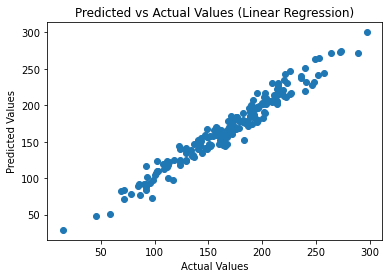

Polynomial Regression (Degree 2) Performance:
Mean Absolute Error: 8.007871936495606
Mean Squared Error: 101.8096344140852
R-squared: 0.9570331750465312




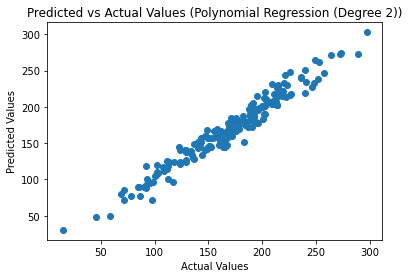

Stepwise Regression Performance:
Mean Absolute Error: 7.994930788765405
Mean Squared Error: 99.7617287470212
R-squared: 0.9578974547861093




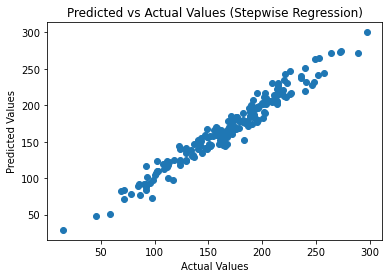

Ridge Regression Performance:
Mean Absolute Error: 7.994926250379189
Mean Squared Error: 99.76166140243966
R-squared: 0.9578974832076126




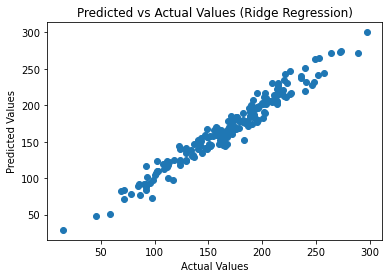

Lasso Regression Performance:
Mean Absolute Error: 7.99462857899918
Mean Squared Error: 99.75803272944373
R-squared: 0.9578990146202173




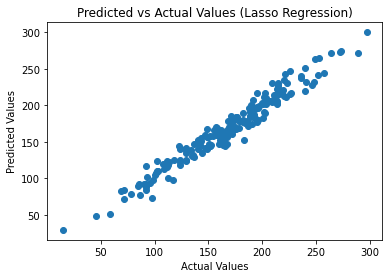

ElasticNet Regression Performance:
Mean Absolute Error: 7.9945979332642
Mean Squared Error: 99.75719681075596
R-squared: 0.9578993674038427




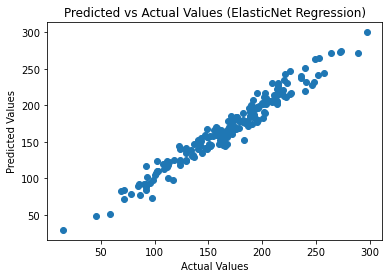

In [25]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n")
    
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Predicted vs Actual Values ({model_name})")
    plt.show()
    
    return mae, mse, r2

# Evaluate all models
results = []
results.append(evaluate_model(linear_model, X_test, y_test, "Linear Regression"))
results.append(evaluate_model(poly_model, X_test_poly, y_test, "Polynomial Regression (Degree 2)"))
results.append(evaluate_model(stepwise_model, X_test_selected, y_test, "Stepwise Regression"))
results.append(evaluate_model(ridge_model, X_test, y_test, "Ridge Regression"))
results.append(evaluate_model(lasso_model, X_test, y_test, "Lasso Regression"))
results.append(evaluate_model(elasticnet_model, X_test, y_test, "ElasticNet Regression"))


# 4. Comparison

In [26]:
# Creating a summary table
comparison_table = pd.DataFrame(results, columns=["MAE", "MSE", "R-squared"],
                                index=["Linear Regression", 
                                       "Polynomial Regression (Degree 2)", 
                                       "Stepwise Regression", 
                                       "Ridge Regression", 
                                       "Lasso Regression", 
                                       "ElasticNet Regression"])
print(comparison_table)


                                       MAE         MSE  R-squared
Linear Regression                 7.994931   99.761729   0.957897
Polynomial Regression (Degree 2)  8.007872  101.809634   0.957033
Stepwise Regression               7.994931   99.761729   0.957897
Ridge Regression                  7.994926   99.761661   0.957897
Lasso Regression                  7.994629   99.758033   0.957899
ElasticNet Regression             7.994598   99.757197   0.957899


# 5. Visualization

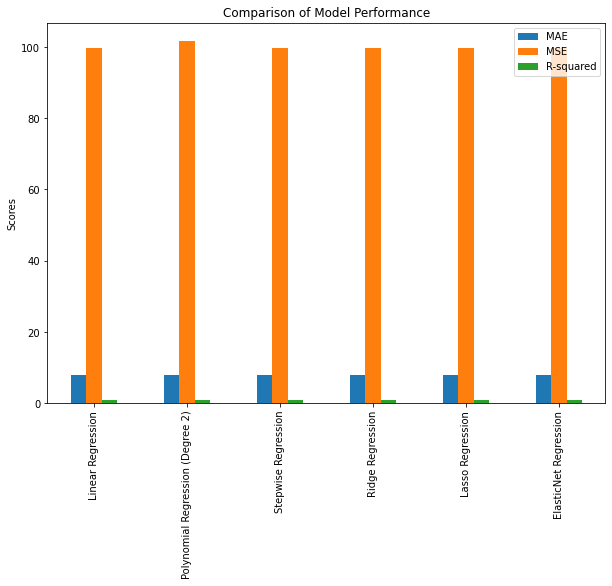

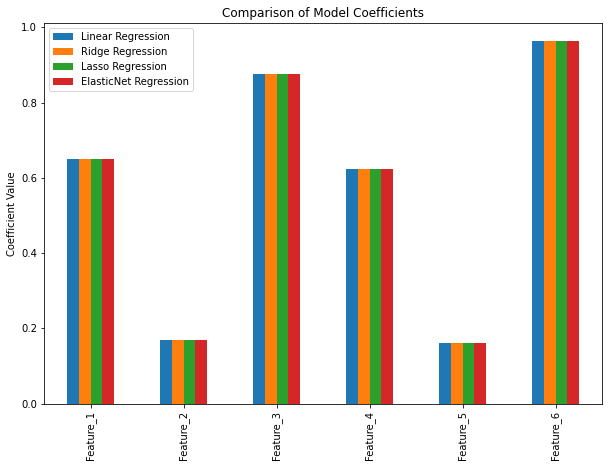

In [27]:
# Comparing model performance visually
comparison_table.plot(kind='bar', figsize=(10, 7))
plt.title('Comparison of Model Performance')
plt.ylabel('Scores')
plt.show()

# Plot the coefficients (if applicable)
coefficients = pd.DataFrame({
    "Linear Regression": linear_model.coef_,
    "Ridge Regression": ridge_model.coef_,
    "Lasso Regression": lasso_model.coef_,
    "ElasticNet Regression": elasticnet_model.coef_
}, index=X.columns)

coefficients.plot(kind='bar', figsize=(10, 7))
plt.title('Comparison of Model Coefficients')
plt.ylabel('Coefficient Value')
plt.show()
